In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [3]:
# Boston Omaha Corp.
bomn = pdr.get_data_yahoo('BOMN','2019-05-31')
bomn.drop('Adj Close', axis=1, inplace=True)
bomn.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-30,24.930000,24.250000,24.93,24.670000,29200
2019-05-31,24.770000,23.812000,24.48,24.129999,57600
2019-06-03,24.719999,23.209999,24.00,24.510000,124900
2019-06-04,24.889999,24.011000,24.52,24.450001,84000
2019-06-05,24.660000,23.700001,24.35,24.270000,60500


In [4]:
bomn['9-day'] = bomn['Close'].rolling(9).mean()
bomn['21-day'] = bomn['Close'].rolling(21).mean()
bomn['Change'] = np.log(bomn.Close / bomn.Close.shift())
bomn.tail()

,High,Low,Open,Close,Volume,9-day,21-day,Change
Date,,,,,,,,
2021-05-25,30.459999,28.010000,29.379999,28.469999,194900,27.522222,27.457619,-0.014645
2021-05-26,29.750000,28.700001,28.700001,29.629999,151700,27.957778,27.538095,0.039936
2021-05-27,30.450001,29.309999,29.920000,29.799999,125500,28.271111,27.629047,0.005721
2021-05-28,30.680000,29.540001,30.070000,30.660000,95600,28.673333,27.750952,0.028451
2021-06-01,31.740000,30.530001,31.000000,31.590000,112900,29.150000,27.920952,0.029882


In [11]:
bomn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2019-05-30 to 2021-06-01
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   High      506 non-null    float64
 1   Low       506 non-null    float64
 2   Open      506 non-null    float64
 3   Close     506 non-null    float64
 4   Volume    506 non-null    int64  
 5   9-day     498 non-null    float64
 6   21-day    486 non-null    float64
 7   Change    505 non-null    float64
 8   position  506 non-null    int32  
 9   system    505 non-null    float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 41.5 KB


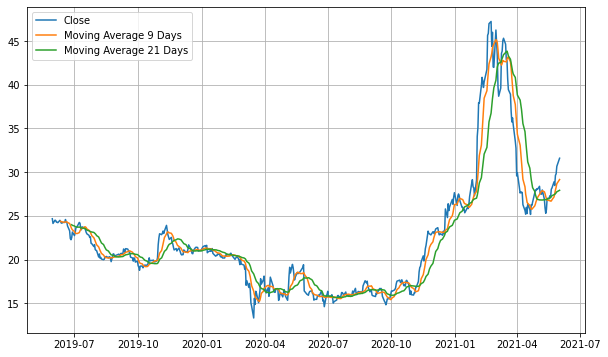

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'],label='Close')
plt.plot(bomn['9-day'],label='Moving Average 9 Days')
plt.plot(bomn['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on the changing period

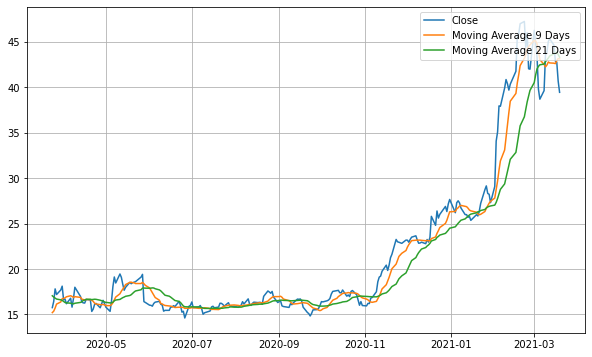

In [12]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'][-300:-50],label='Close')
plt.plot(bomn['9-day'][-300:-50],label='Moving Average 9 Days')
plt.plot(bomn['21-day'][-300:-50],label='Moving Average 21 Days')
plt.legend(loc=1)

## Zoom in from the beginning to -200 days of the DataFrame

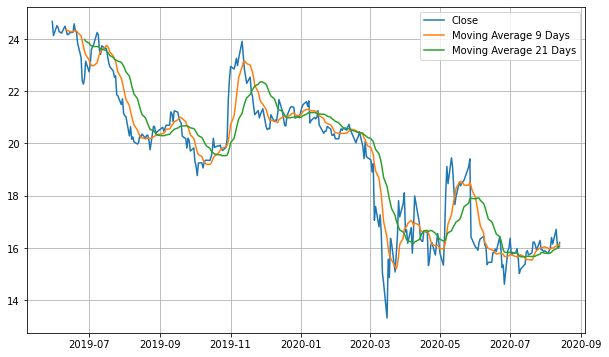

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(bomn['Close'][:-200],label='Close')
plt.plot(bomn['9-day'][:-200],label='Moving Average 9 Days')
plt.plot(bomn['21-day'][:-200:],label='Moving Average 21 Days')
plt.legend(loc=1)

In [9]:
# When the faster moving average is moving above the slower one, indicates time to buy
bomn['position'] = np.where(bomn['9-day'] > bomn['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
bomn['position'] = np.where(bomn['9-day'] < bomn['21-day'],-1,bomn['position'])

<AxesSubplot:xlabel='Date'>

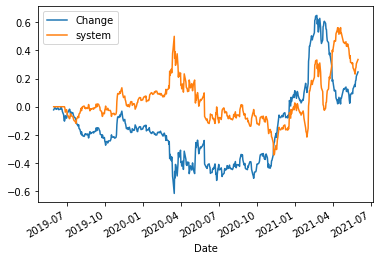

In [10]:
# Whether we are making money with this system
bomn['system'] = bomn['position'] * bomn['Change']
bomn[['Change','system']].cumsum().plot()